In [76]:
print("Hello, World!")

Hello, World!


In [77]:
import pandas as pd

file_path = r"C:\Users\Dell\Desktop\customer_churn_project\data\Customer_Churn_Data_Large.xlsx"
df = pd.read_excel(file_path)

df.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [78]:
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

In [79]:
xls.sheet_names

['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [80]:
# sheet_load.

In [81]:
demo_df   = pd.read_excel(xls, sheet_name="Customer_Demographics")
txn_df    = pd.read_excel(xls, sheet_name="Transaction_History")
service_df= pd.read_excel(xls, sheet_name="Customer_Service")
online_df = pd.read_excel(xls, sheet_name="Online_Activity")
churn_df  = pd.read_excel(xls, sheet_name="Churn_Status")

In [82]:
# to confirm data is loaded correctly

In [83]:
demo_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [84]:
txn_df['CustomerID'].value_counts().head()
service_df['CustomerID'].value_counts().head()
online_df['CustomerID'].value_counts().head()

CustomerID
1    1
2    1
3    1
4    1
5    1
Name: count, dtype: int64

In [85]:
# churn sheet base

In [86]:
base_df = churn_df.copy()
base_df.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [87]:
final_df = base_df.merge(demo_df, on='CustomerID', how='left')

In [88]:
final_df = final_df.merge(txn_df, on='CustomerID', how='left')

In [89]:
final_df = final_df.merge(service_df, on='CustomerID', how='left')

In [90]:
final_df = final_df.merge(online_df, on='CustomerID', how='left')

In [91]:
final_df.shape

(6812, 17)

In [92]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   ChurnStatus       6812 non-null   int64         
 2   Age               6812 non-null   int64         
 3   Gender            6812 non-null   str           
 4   MaritalStatus     6812 non-null   str           
 5   IncomeLevel       6812 non-null   str           
 6   TransactionID     6812 non-null   int64         
 7   TransactionDate   6812 non-null   datetime64[us]
 8   AmountSpent       6812 non-null   float64       
 9   ProductCategory   6812 non-null   str           
 10  InteractionID     5204 non-null   float64       
 11  InteractionDate   5204 non-null   datetime64[us]
 12  InteractionType   5204 non-null   str           
 13  ResolutionStatus  5204 non-null   str           
 14  LastLoginDate     6812 non-null   d

In [59]:
# fill missing values

In [93]:
# No interaction = 0
final_df['InteractionID'] = final_df['InteractionID'].fillna(0)

# Category fill
final_df['InteractionType'] = final_df['InteractionType'].fillna('No_Interaction')
final_df['ResolutionStatus'] = final_df['ResolutionStatus'].fillna('No_Interaction')

# Date missing -> very old date OR flag
final_df['InteractionDate'] = final_df['InteractionDate'].fillna(
    final_df['InteractionDate'].min()
)

In [94]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   ChurnStatus       6812 non-null   int64         
 2   Age               6812 non-null   int64         
 3   Gender            6812 non-null   str           
 4   MaritalStatus     6812 non-null   str           
 5   IncomeLevel       6812 non-null   str           
 6   TransactionID     6812 non-null   int64         
 7   TransactionDate   6812 non-null   datetime64[us]
 8   AmountSpent       6812 non-null   float64       
 9   ProductCategory   6812 non-null   str           
 10  InteractionID     6812 non-null   float64       
 11  InteractionDate   6812 non-null   datetime64[us]
 12  InteractionType   6812 non-null   str           
 13  ResolutionStatus  6812 non-null   str           
 14  LastLoginDate     6812 non-null   d

In [61]:
# date type conversion

In [95]:
final_df['TransactionYear'] = final_df['TransactionDate'].dt.year

final_df['LastLoginRecency'] = (
    final_df['LastLoginDate'].max() - final_df['LastLoginDate']
).dt.days

In [63]:
#drop unnecessary date columns

In [96]:
final_df.drop(
    columns=['TransactionDate', 'InteractionDate', 'LastLoginDate'],
    inplace=True
)

In [97]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        6812 non-null   int64  
 1   ChurnStatus       6812 non-null   int64  
 2   Age               6812 non-null   int64  
 3   Gender            6812 non-null   str    
 4   MaritalStatus     6812 non-null   str    
 5   IncomeLevel       6812 non-null   str    
 6   TransactionID     6812 non-null   int64  
 7   AmountSpent       6812 non-null   float64
 8   ProductCategory   6812 non-null   str    
 9   InteractionID     6812 non-null   float64
 10  InteractionType   6812 non-null   str    
 11  ResolutionStatus  6812 non-null   str    
 12  LoginFrequency    6812 non-null   int64  
 13  ServiceUsage      6812 non-null   str    
 14  TransactionYear   6812 non-null   int32  
 15  LastLoginRecency  6812 non-null   int64  
dtypes: float64(2), int32(1), int64(6), str(7)
memory usag

In [98]:
final_df.describe()

,CustomerID,ChurnStatus,Age,TransactionID,AmountSpent,InteractionID,LoginFrequency,TransactionYear,LastLoginRecency
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0,6812.000000
mean,500.169260,0.198473,43.274516,5497.323253,251.620527,4523.982090,25.724310,2022.0,177.793893
std,286.704642,0.398880,15.286788,2584.768541,142.901693,3237.346139,14.062032,0.0,104.145325
min,1.000000,0.000000,18.000000,1000.000000,5.180000,0.000000,1.000000,2022.0,0.000000
25%,247.000000,0.000000,30.000000,3223.500000,127.100000,2120.000000,14.000000,2022.0,91.000000
50%,505.500000,0.000000,44.000000,5515.000000,251.845000,4688.000000,26.000000,2022.0,171.000000
75%,750.000000,0.000000,56.000000,7675.250000,375.280000,7293.000000,38.000000,2022.0,263.000000
max,1000.000000,1.000000,69.000000,9997.000000,499.860000,9997.000000,49.000000,2022.0,364.000000


In [67]:
import seaborn as sns

<Axes: xlabel='ChurnStatus', ylabel='count'>

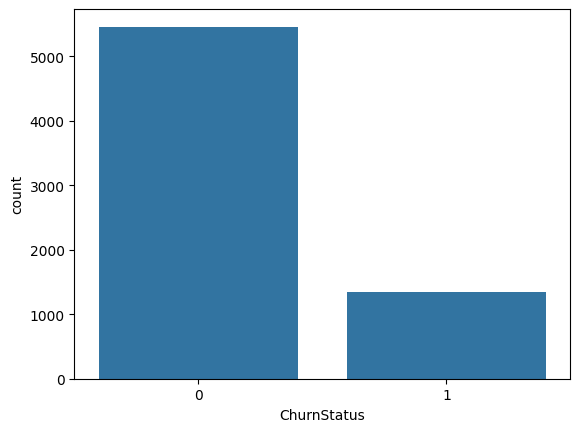

In [68]:
sns.countplot(x='ChurnStatus', data=final_df)

<Axes: xlabel='ChurnStatus', ylabel='Age'>

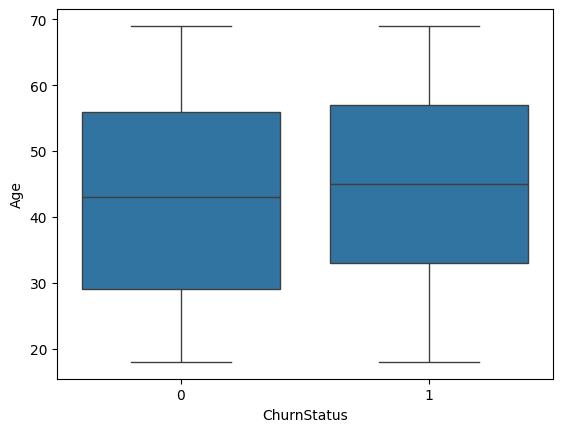

In [69]:
sns.boxplot(x='ChurnStatus', y='Age', data=final_df)

<Axes: xlabel='ChurnStatus', ylabel='AmountSpent'>

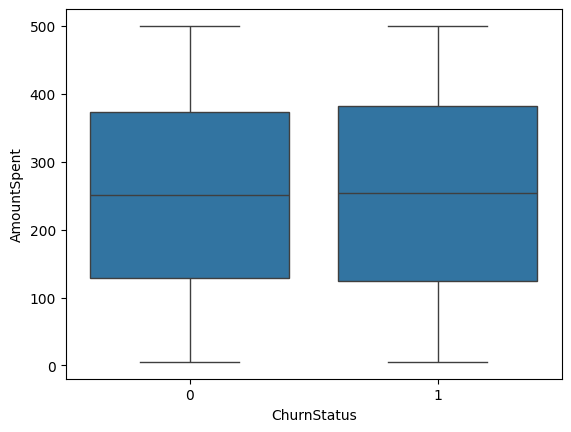

In [70]:
sns.boxplot(x='ChurnStatus', y='AmountSpent', data=final_df)

<Axes: xlabel='ChurnStatus', ylabel='LoginFrequency'>

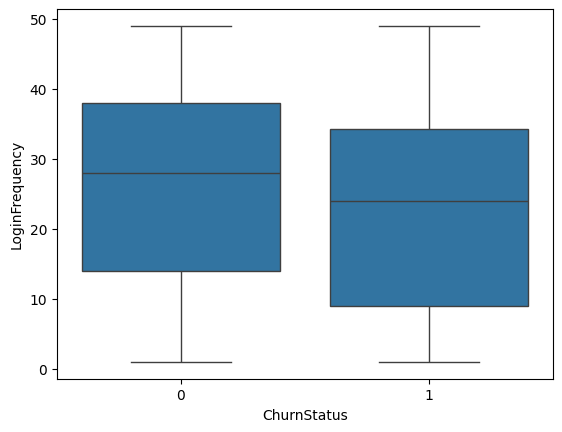

In [71]:
sns.boxplot(x='ChurnStatus', y='LoginFrequency', data=final_df)

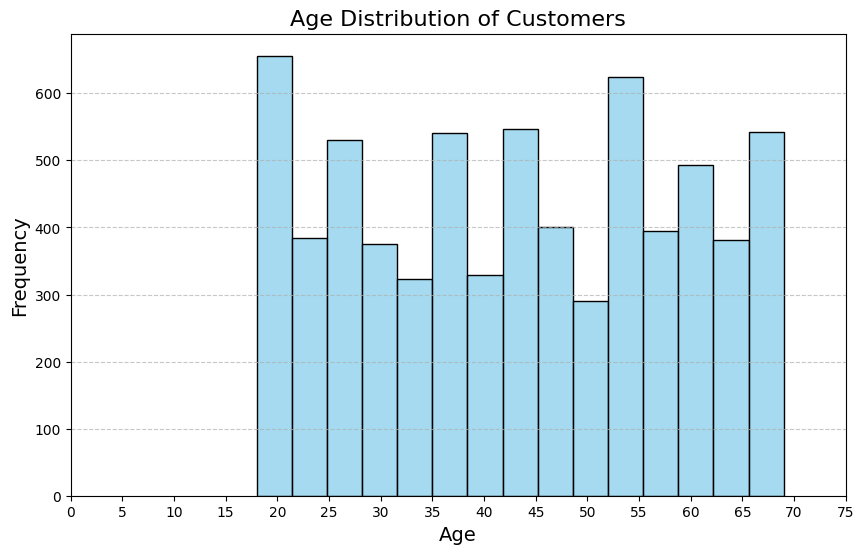

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure size
plt.figure(figsize=(10,6))

# Histogram
sns.histplot(final_df['Age'], bins=15, kde=False, color='skyblue')

# Titles and labels
plt.title('Age Distribution of Customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 80, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23092\1895546497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='ChurnStatus', data=churn_rate_gender, palette='pastel')


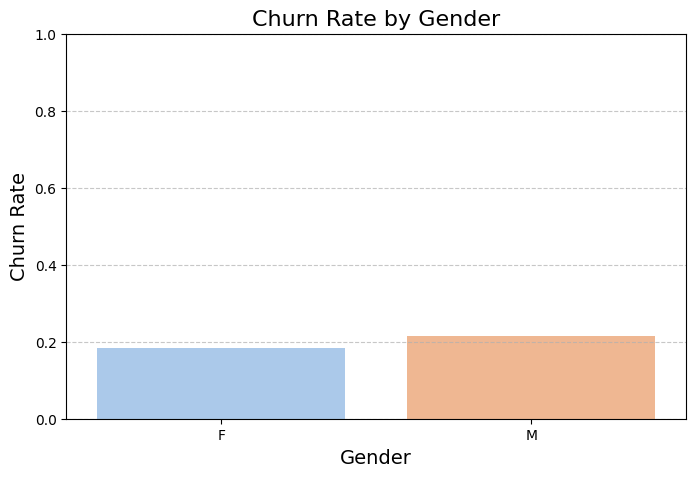

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by gender
churn_rate_gender = final_df.groupby('Gender')['ChurnStatus'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='ChurnStatus', data=churn_rate_gender, palette='pastel')

# Titles and labels
plt.title('Churn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [74]:
pd.crosstab(final_df['Gender'], final_df['ChurnStatus'], normalize='index')

ChurnStatus,0,1
Gender,,
F,0.816760,0.183240
M,0.784653,0.215347


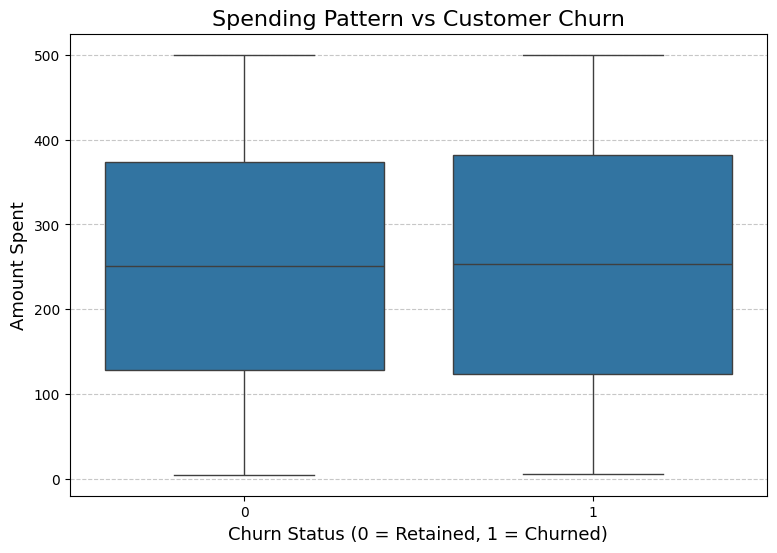

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

sns.boxplot(
    x='ChurnStatus',
    y='AmountSpent',
    data=final_df
)

plt.title('Spending Pattern vs Customer Churn', fontsize=16)
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)', fontsize=13)
plt.ylabel('Amount Spent', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [99]:
#model preparation

In [100]:
final_df.head()

,CustomerID,ChurnStatus,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,AmountSpent,ProductCategory,InteractionID,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,TransactionYear,LastLoginRecency
0,1,0,62,M,Single,Low,7194,416.50,Electronics,6363.0,Inquiry,Resolved,34,Mobile App,2022,71
1,2,1,65,M,Married,Low,7250,54.96,Clothing,3329.0,Inquiry,Resolved,5,Website,2022,26
2,2,1,65,M,Married,Low,9660,197.50,Electronics,3329.0,Inquiry,Resolved,5,Website,2022,26
3,2,1,65,M,Married,Low,2998,101.31,Furniture,3329.0,Inquiry,Resolved,5,Website,2022,26
4,2,1,65,M,Married,Low,1228,397.37,Clothing,3329.0,Inquiry,Resolved,5,Website,2022,26


In [ ]:
      #GOAL
# Taget and features split
# categorical to numerical conversion
# Train test split

In [101]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [106]:
# Target and features split
y = final_df["ChurnStatus"]
X = final_df.drop(columns=["ChurnStatus", "CustomerID"])


In [107]:
# Identify categorical columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

C:\Users\Dell\AppData\Local\Temp\ipykernel_23092\721304622.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include="object").columns


In [108]:
# label encoding for categorical variables
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [109]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [110]:
# Import and create model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

In [111]:
# Train model
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [112]:
# predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [113]:
# evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.962582538517975
Precision: 0.9296875
Recall: 0.8782287822878229
F1 Score: 0.9032258064516129
ROC-AUC: 0.9877944933295487

Confusion Matrix:
 [[1074   18]
 [  33  238]]


In [115]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
10,LoginFrequency,0.183093
13,LastLoginRecency,0.180743
0,Age,0.155237
7,InteractionID,0.118870
2,MaritalStatus,0.063990
5,AmountSpent,0.052703
3,IncomeLevel,0.051146
4,TransactionID,0.047066
11,ServiceUsage,0.043731
8,InteractionType,0.032984
